In [0]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import load_model

In [0]:
# Каталог с данными для обучения
train_dir = 'test1'
# Каталог с данными для проверки
val_dir = 'test1'
# Каталог с данными для тестирования
test_dir = 'test1'
# Размеры изображения
img_width, img_height = 28, 28
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 30
# Количество классов
class_num = 5
# Размер мини-выборки
batch_size = 16
# Количество изображений для обучения
nb_train_samples = 200
# Количество изображений для проверки
nb_validation_samples = 200
# Количество изображений для тестирования
nb_test_samples = 200

In [0]:
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(28, 28, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(class_num, activation='softmax'))

# Задаем параметры оптимизации
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
from tensorflow import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM, BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras import backend as K
from keras.constraints import maxnorm

model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3, 3), padding='valid', input_shape=(28, 28, 3), activation='relu'))
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [0]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


In [0]:
train_generator.class_indices

In [0]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

In [0]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

In [0]:
# Сохранение модели 
model_json = model.to_json()
json_file = open("nero_model.json", "w")
# Записываем архитектуру сети в файл
json_file.write(model_json)
json_file.close()
# Записываем данные о весах в файл
model.save_weights("nero_model.h5")
model.save("nero_model.h5")
print("Сохранение сети завершено")

In [0]:
model = load_model('nero_model.h5')

In [0]:
from google.colab import files
files.upload()


Saving IMG_20191106_120916 (3).jpg to IMG_20191106_120916 (3).jpg


{'IMG_20191106_120916 (3).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x1b\xa8Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x06\x00\x0b\x00\x02\x00\x00\x00&\x00\x00\x08b\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x011\x00\x02\x00\x00\x00&\x00\x00\x08\x88\x012\x00\x02\x00\x00\x00\x14\x00\x00\x08\xae\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x08\xc2\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00V\x00\x00\x11F\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [0]:
from keras.utils import np_utils
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = 'image (1).png'
Image(img_path, width=150, height=150)
img = image.load_img(img_path, target_size=(28, 28))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.


prediction = model.predict(img_array)
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)

Номер класса: 3


In [0]:
!unzip test1.zip

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import random
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_file = "IMG_20191106_120916 (3).jpg"
img = cv2.imread(image_file)
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
#im = cv2.filter2D(img, -1, kernel)
#cv2_imshow(im)


edges2 = cv2.Canny(edges,180,255)
cv2_imshow(edges2)




NameError: ignored

In [0]:
img = cv2.imread("IMG_20191106_120916 (3).jpg", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,200,255)
cv2_imshow(edges)
_,contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
i = 0
while i < len(contours):
  cv2.drawContours(img, contours, i, (random.randrange(0, 255, 1),random.randrange(0, 255, 1),random.randrange(0, 255, 1)), 2)
  cv2_imshow(img)
  cv2.imwrite("nero_letter/ner0_{0}.png".format(i), img) 
  print("Площадь:",cv2.contourArea(contours[i]))
  i = i + 1

NameError: ignored

In [0]:
!zip -r nero.zip nero_letter
files.download('nero.zip')

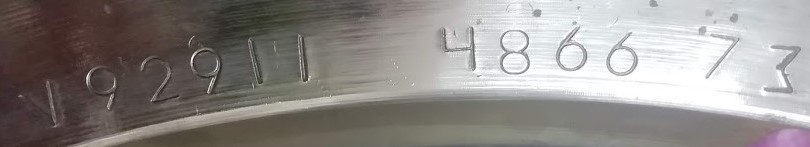

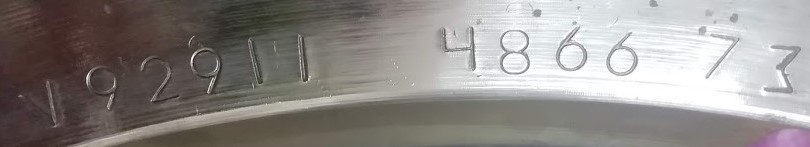

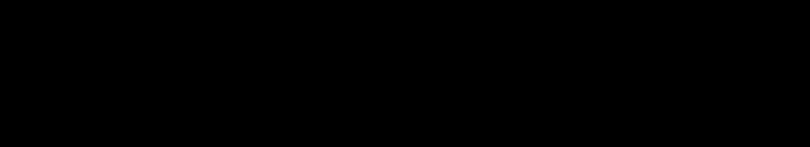

In [0]:
(import numpy as np
import cv2 as cv

# параметры цветового фильтра
hsv_min = np.array((59, 119, 17), np.uint8)
hsv_max = np.array((79, 255, 255), np.uint8)

img = cv.imread("IMG_20191106_120916 (3).jpg")

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV )
# меняем цветовую модель с BGR на HSV
thresh = cv.inRange(hsv, hsv_min, hsv_max )
# применяем цветовой фильтр
# ищем контуры и складируем их в переменную contours
image,contours, hierarchy = cv.findContours(thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# hierarchy хранит информацию об иерархии
# отображаем контуры поверх изображения
cv.drawContours(img, contours, -1, (255, 0, 0), 2, cv.LINE_AA, hierarchy, 0)
cv2_imshow(img)
cv.drawContours(img, contours, -1, (255, 0, 0), 2, cv.LINE_AA, hierarchy, 2)

# выводим итоговое изображение в окно
cv2_imshow(img)
cv2_imshow(thresh)
